In [137]:
import numpy as np
import matplotlib.pyplot as plt

## Different Measures of Centrality 

There are 3 measures of centrality:

1. Mean - The avg value from a set
2. Median - The middle value from a set.
3. Mode -  The most frequent value from the set

In [104]:
#Input couple of values for which you want to visualize the mean,median and mode
list_to_mode_mean_median = input("enter some values to which we have to find mean(in space separated):")

enter some values to which we have to find mean(in space separated):23 21 20 19 25 27 30 32 35 40


## Function to Plot mean, median, mode

In [105]:
def plot_fn(list_to_mode_mean_median,type_of_centrality,legend_value):
    plt.plot(list_to_mode_mean_median,list_to_mode_mean_median,color="gray",marker="o")
    plt.scatter(type_of_centrality,type_of_centrality,c="red",marker="D")
    plt.legend(["Data Points",legend_value])
    print(legend_value + ":",type_of_centrality)
    plt.show()

### Mean

In [106]:
#The input entered is in string format. Convert each input entered into integer and make a list of all values. 
list_to_mode_mean_median = list_to_mode_mean_median.split()
list_to_mode_mean_median = [int(x) for x in list_to_mode_mean_median]
list_to_mode_mean_median

[23, 21, 20, 19, 25, 27, 30, 32, 35, 40]

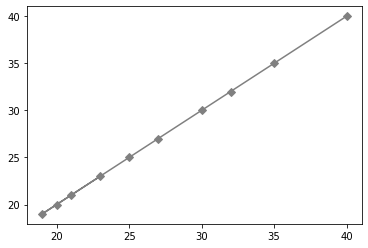

In [107]:
# Plot all the values of the list to see how the data in list is present
plt.plot(list_to_mode_mean_median,list_to_mode_mean_median,color="grey",marker="D")

plt.show()

In [108]:
# find the mean of the list of values
mean_value = np.mean(list_to_mode_mean_median)

Mean Value: 27.2


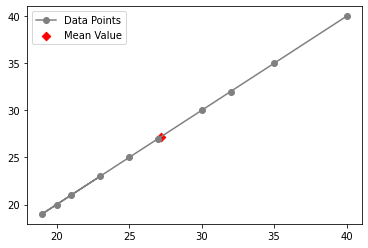

In [109]:
# Now check where the mean stands in the visualization w.r.t data
plot_fn(list_to_mode_mean_median,mean_value,"Mean Value")

So we can see a small red dot(X mark) which depicts where the mean is present in the plot. 
This depicts that the user data entered typical on an average is around 27(for the above example)

### Median

In [110]:
median = np.median(list_to_mode_mean_median)

Median Value: 26.0


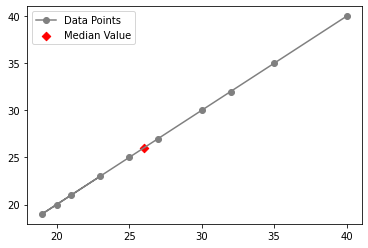

In [111]:
# Now check where the median stands in the visualization w.r.t data
plot_fn(list_to_mode_mean_median,median,"Median Value")

### Mode

Mode can be calculated by using scipy.stats library. It returns an array of the most common value in the array.
If several values have same value(most frequent value). The smallest is returned.

In [112]:
from scipy import stats
mode =stats.mode(list_to_mode_mean_median)

In [113]:
mode_value = float(mode[0])

Mode Value: 19.0


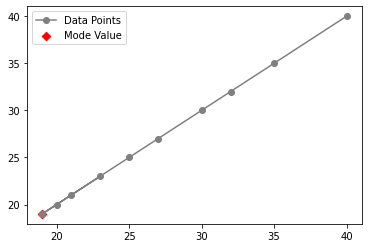

In [114]:
# Now check where the mode stands in the visualization w.r.t data
plot_fn(list_to_mode_mean_median,mode_value,"Mode Value")

## Sensitivity for Outliers

To demonstrate this concept, i am taking an example of having certain placements packages offered at certain universities. The values are in lakhs.

In [115]:
Placements_package_data = [12,7.5,8,10.5,15.5,3.3,45,12,18,16]

From the given data it is hard to find if there are any outliers. So lets sort the data. 

In [116]:
Placements_package_data.sort()


In [117]:
print("Sorted Values:",Placements_package_data)

Sorted Values: [3.3, 7.5, 8, 10.5, 12, 12, 15.5, 16, 18, 45]


From above, we see that most of the values are within 20lk. But there is one value which is 45. This value is much further than the other typical set of values in the set.  

Mean Value: 14.780000000000001


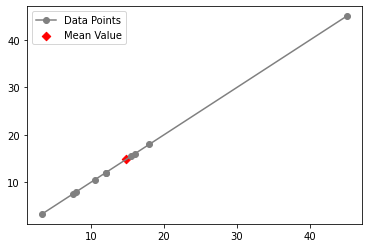

In [118]:
Average_package = np.mean(Placements_package_data)
plot_fn(Placements_package_data,Average_package,"Mean Value")

From the above it is more clear that the value 45(top right most) looks like an outlier as generally other values are below 20(units is lk)

Lets see what is the median value of the package. 

Median Value: 12.0


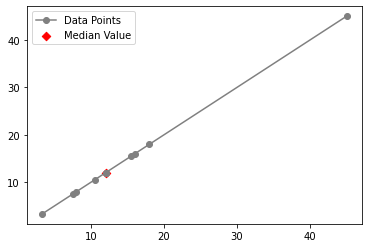

In [119]:
Median = np.median(Placements_package_data)
plot_fn(Placements_package_data,Median,"Median Value")

The median value is 12,i.e., 12lk. So the data in hand suggests that half of the students have an package below 12lk. 

Remove the outlier value from the list

In [120]:
Placements_package_data.remove(45)

In [121]:
Placements_package_data

[3.3, 7.5, 8, 10.5, 12, 12, 15.5, 16, 18]

Recompute the Mean & Median again

Mean Value: 11.422222222222222


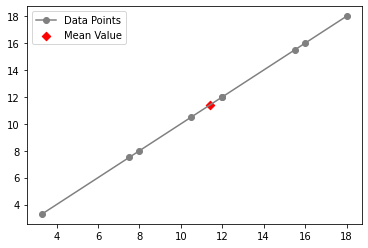

In [122]:
new_Average_package = np.mean(Placements_package_data)
plot_fn(Placements_package_data,new_Average_package,"Mean Value")

Median Value: 12.0


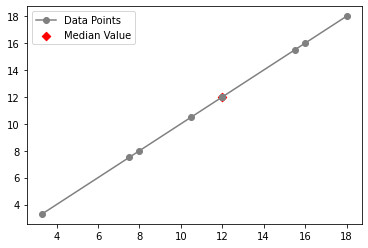

In [123]:
new_Median = np.median(Placements_package_data)
plot_fn(Placements_package_data,new_Median,"Median Value")

From both above plots, we can see how the mean is sensitive to outlier. If we remove the outlier the mean changes drastically. 
However, the median remains more or less the same.

**Note:** In the above example, the mean just got reduced by 3(3lk). If we have a bigger data, the change in mean will be large in case of outliers present. In case a bigger data is present, the median might vary slightly(very insignificant to change in mean)

### Trimmed Mean

Trimmed mean is calculated by removing same amount of values from left/right based on number of outliers removed. 

Since, the given data had one outlier(45), so we remove one element from left as well.

In [124]:
Placements_package_data.pop(0)

3.3

In [125]:
Placements_package_data

[7.5, 8, 10.5, 12, 12, 15.5, 16, 18]

Recompute the Mean & Median again

Mean Value: 12.4375


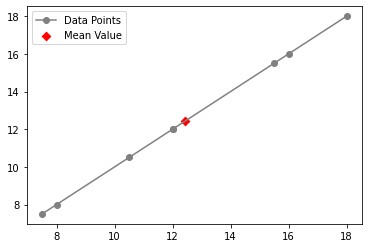

In [126]:
Trimmed_Average_package = np.mean(Placements_package_data)
plot_fn(Placements_package_data,Trimmed_Average_package,"Mean Value")

Median Value: 12.0


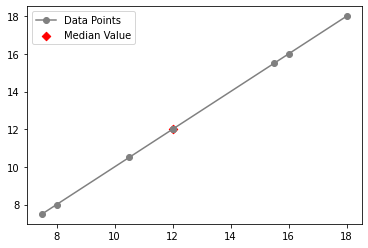

In [127]:
Trimmed_Median = np.median(Placements_package_data)
plot_fn(Placements_package_data,Trimmed_Median,"Median Value")

## Mean - Centre of Gravity

In this section, I am going to speak how mean acts as a balancer between value on its right and the value on its left. 

In [128]:
list_of_data = [i**2 + i*2 for i in range(1,16,2)]

In [129]:
list_of_data

[3, 15, 35, 63, 99, 143, 195, 255]

In [130]:
Mean_value = np.mean(list_of_data)

Mean Value: 101.0


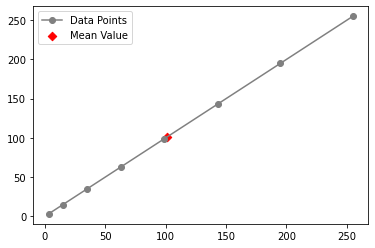

In [131]:
plot_fn(list_of_data,Mean_value,"Mean Value")

Subtract each value in the list with its mean value

In [132]:
deviation = list_of_data - Mean_value

In [133]:
deviation

array([-98., -86., -66., -38.,  -2.,  42.,  94., 154.])

Sum over the list of values (deviation)

In [136]:
sum_of_deviation_from_mean = np.sum(deviation)
print("Sum of the Deviation of Values from Mean Value:",sum_of_deviation_from_mean)

Sum of the Deviation of Values from Mean Value: 0.0


Mean Value: 101.0


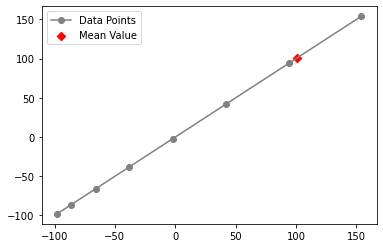

In [135]:
plot_fn(deviation,Mean_value,"Mean Value")

From above, we can observe that The mean value acts as a balancer between its right and left values present. 
The mean can be considered as the **Fulcrum** in a *seasaw*.

*for example:* if for the above example, lets assume if we push the mean slightly towards left, the right side tilts just like a seasaw. 

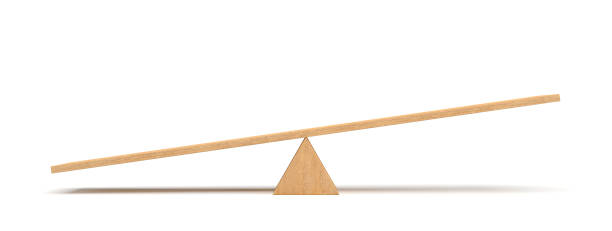